In [8]:
import os, os.path as osp
from src.visualization.render_mp4 import unpickle_data
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
from glob import glob
import cv2
import imageio

from src.visualization.render_mp4 import mp4_from_pickle_jupyter


In [37]:
base_path = Path("../video_media/real/videos_04.06.2024_evening_converted/imgs")

med_part_succ_seq1 = base_path / "succ-seq-1"
med_part_succ_seq2 = base_path / "succ-seq-2"
low_obs_succ_seq1 = base_path / "succ-seq-obs-vary-1"
low_obs_succ_seq2 = base_path / "succ-seq-obs-vary-3"
part_fail_seq1 = base_path / "part-fail-seq-1"
part_fail_seq2 = base_path / "part-fail-seq-2"

img_paths = [
    med_part_succ_seq1,
    low_obs_succ_seq2,
    med_part_succ_seq2,
    low_obs_succ_seq1,
    # part_fail_seq1,
    # part_fail_seq2
]

sorted_paths_dict = {}
for img_path in img_paths:
    sorted_paths_dict[img_path] = sorted([osp.join(img_path, fn) for fn in os.listdir(img_path) if fn.endswith('.png')])

for k, v in sorted_paths_dict.items():
    print(k, len(v))

../video_media/real/videos_04.06.2024_evening_converted/imgs/succ-seq-1 8
../video_media/real/videos_04.06.2024_evening_converted/imgs/succ-seq-obs-vary-3 9
../video_media/real/videos_04.06.2024_evening_converted/imgs/succ-seq-2 8
../video_media/real/videos_04.06.2024_evening_converted/imgs/succ-seq-obs-vary-1 8


In [38]:
def crop_image_normalized(image: np.ndarray, top: float, left: float, height: float, width: float) -> np.ndarray:
    """
    Crop an image to a specified rectangular region using normalized coordinates.

    Parameters:
    image (np.ndarray): The input image as a NumPy array.
    top (float): The top coordinate of the crop (0.0 to 1.0).
    left (float): The left coordinate of the crop (0.0 to 1.0).
    height (float): The height of the crop (0.0 to 1.0).
    width (float): The width of the crop (0.0 to 1.0).

    Returns:
    np.ndarray: The cropped image.
    """
    img_height, img_width = image.shape[:2]

    top_pixel = int(top * img_height)
    left_pixel = int(left * img_width)
    height_pixel = int(height * img_height)
    width_pixel = int(width * img_width)

    return image[top_pixel:top_pixel + height_pixel, left_pixel:left_pixel + width_pixel]

def plot_images(path, inds_to_plot):
    img_paths = sorted_paths_dict[path]

    np_imgs = []
    for i, img_path in enumerate(img_paths):
        if i not in inds_to_plot:
            continue
        img = imageio.imread(img_path)

        img = crop_image_normalized(img, top=0.2, left=0.25, height=1.0, width=0.5)

        np_imgs.append(img)

    w = 24 / 7 
    # fig, axs = plt.subplots(1, len(np_imgs), figsize=(16, 3.25))
    # fig, axs = plt.subplots(1, len(np_imgs), figsize=(24, 3.25))
    fig, axs = plt.subplots(1, len(np_imgs), figsize=(w * len(np_imgs), 3.25))
    for i, ax in enumerate(axs.flat):
        ax.imshow(np_imgs[i])
        ax.axis("off")

    # Remove whitespace between subplots
    plt.subplots_adjust(wspace=0, hspace=0)

    # Make a title with the randomness
    # title = "test"

    # fig.suptitle(f"{title}", fontsize=20)

/tmp/ipykernel_669351/4112069165.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


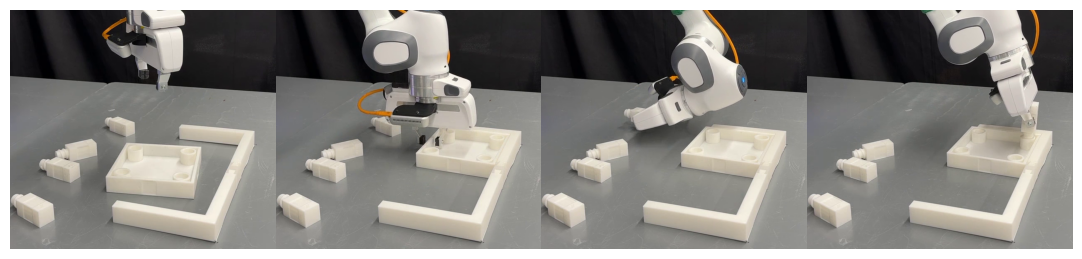

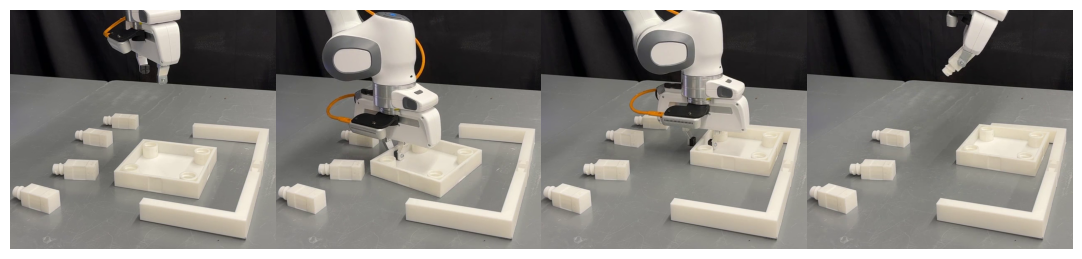

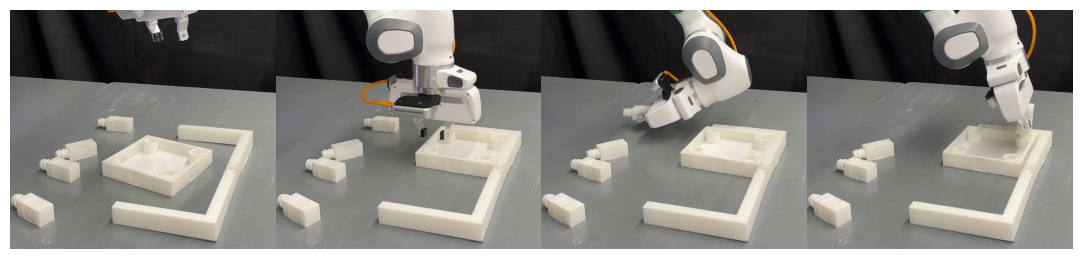

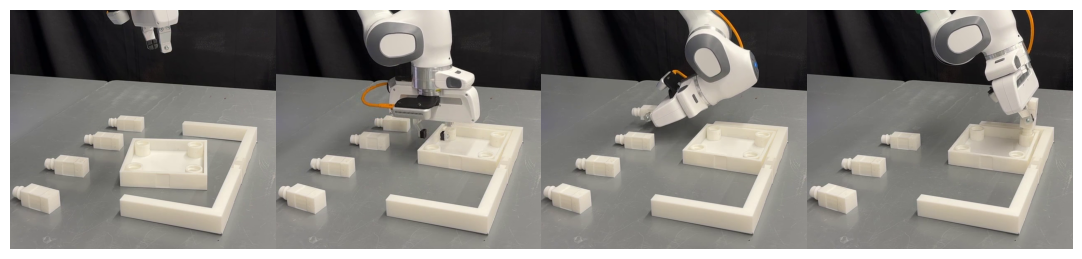

In [39]:
inds_to_plot = [0, 2, 3, 5]
for path in sorted_paths_dict.keys():
    plot_images(path, inds_to_plot=inds_to_plot)

../video_media/real/videos_04.06.2024_evening_converted/imgs/part-fail-seq-1 7
../video_media/real/videos_04.06.2024_evening_converted/imgs/part-fail-seq-2 7


/tmp/ipykernel_669351/4112069165.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


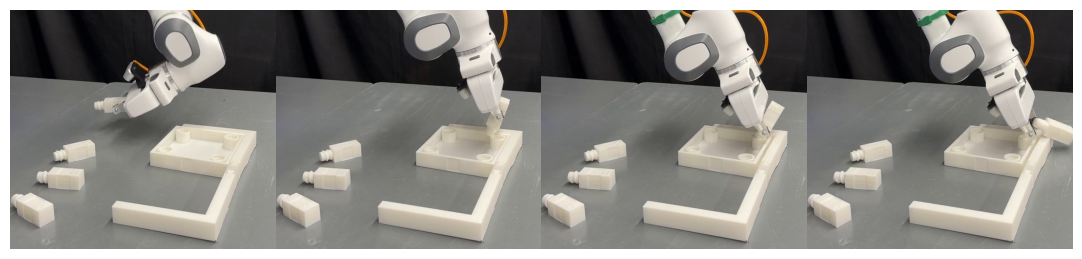

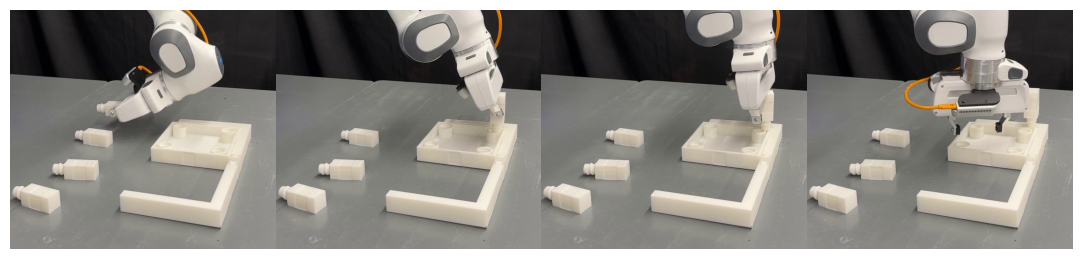

In [40]:
img_paths = [
    part_fail_seq1,
    part_fail_seq2
]

sorted_paths_dict = {}
for img_path in img_paths:
    sorted_paths_dict[img_path] = sorted([osp.join(img_path, fn) for fn in os.listdir(img_path) if fn.endswith('.png')])

for k, v in sorted_paths_dict.items():
    print(k, len(v))


inds_to_plot = [2, 4, 5, 6]
for path in sorted_paths_dict.keys():
    plot_images(path, inds_to_plot=inds_to_plot)
